In [3]:
from google.colab import files
uploaded = files.upload()

Saving Вопросы карьеры.csv to Вопросы карьеры.csv
Saving Вредные привычки, зависимость.csv to Вредные привычки, зависимость.csv
Saving Горе, потери.csv to Горе, потери.csv
Saving Депрессия.csv to Депрессия.csv
Saving Нервные расстройства.csv to Нервные расстройства.csv
Saving О достижении цели.csv to О достижении цели.csv
Saving Отношения с окружающими.csv to Отношения с окружающими.csv
Saving Поиск решения.csv to Поиск решения.csv
Saving Проблемы с детьми.csv to Проблемы с детьми.csv
Saving Проблемы с партнером.csv to Проблемы с партнером.csv
Saving Размышления о мире.csv to Размышления о мире.csv
Saving Самопознание, саморазвитие.csv to Самопознание, саморазвитие.csv
Saving Семейные проблемы.csv to Семейные проблемы.csv


In [4]:
!ls

 sample_data			     'Отношения с окружающими.csv'
'Вопросы карьеры.csv'		     'Поиск решения.csv'
'Вредные привычки, зависимость.csv'  'Проблемы с детьми.csv'
'Горе, потери.csv'		     'Проблемы с партнером.csv'
 Депрессия.csv			     'Размышления о мире.csv'
'Нервные расстройства.csv'	     'Самопознание, саморазвитие.csv'
'О достижении цели.csv'		     'Семейные проблемы.csv'


Let's create 2 files: training and test data

test data - 20%

In [5]:
from sklearn.model_selection import train_test_split
import os
import glob

In [6]:
extension = 'csv'
file_names = [i for i in glob.glob('*.{}'.format(extension))]
file_names_size = len(file_names);

Let's mark the data: add a column in which the value will mean the category number

In [7]:
import pandas as pd
import numpy as np

In [8]:
data_train = []
data_test = []

i = 0
while i<file_names_size:
  df = pd.read_csv(file_names[i], header=0)
  df['THEME'] = i
  train, test = train_test_split(df, test_size=0.2, random_state=2)
  data_train.append(train)
  data_test.append(test)
  i = i + 1

combining the data into a single file

-train

In [9]:
final_data_train = pd.concat(data_train)
final_data_train.to_csv( 'train.csv', index=False, encoding='utf-8-sig')
!wc -l train.csv

10545 train.csv


-test

In [10]:
final_data_test = pd.concat(data_test)
final_data_test.to_csv( "test.csv", index=False, encoding='utf-8-sig')
!wc -l test.csv

2642 test.csv


In [11]:
train = pd.read_csv('train.csv', header=0)
train[:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
0,978,u101679,Mi-shel,Муж в реанимации. Просто поддержите,Вчера в 5 утра у мужа случился обширный инсуль...,2017-05-10 05:55,6,https://www.b17.ru/forum/topic.php?id=75927,0
1,863,u261348,катерина121,чувство вины. Незавершенность ситуации,перестала общаться с молод. человеком,2017-09-30 18:26,2,https://www.b17.ru/forum/topic.php?id=89707,0
2,658,u326689,LusiLi,Страдания и переживания сопровождают меня посл...,"Здравствуйте! Пишу сюда, потому что не знаю и ...",2018-05-04 16:44,1,https://www.b17.ru/forum/topic.php?id=115519,0


In [12]:
test = pd.read_csv('test.csv', header=0)
test[:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
0,71,u478927,Akkie,Бывший отрезал от потенциально интересующей ме...,Рассталась с молодым человеком очень тяжело по...,2020-02-22 21:19,3,https://www.b17.ru/forum/topic.php?id=303879,0
1,945,u238151,Юлия,Решилась. Поддержите (((,"Дошла до точки,решилась.Сегодня соберу все его...",2017-06-12 13:10,21,https://www.b17.ru/forum/topic.php?id=78871,0
2,951,u239602,Воскресение,переживание расставания,Здравствуйте. Более полутора года назад в наше...,2017-06-11 16:05,2,https://www.b17.ru/forum/topic.php?id=78797,0


Protection against unexpected strings such as 'nan'

In [13]:
trb_nan_idx = train[pd.isnull(train['MESSAGE'])].index.tolist()
train.loc[trb_nan_idx, 'MESSAGE'] = ' '
train.loc[trb_nan_idx, 'MESSAGE'] = ' '

In [14]:
from tensorflow.keras import utils
x_train = train['MESSAGE']
y_train = utils.to_categorical(train['THEME'],file_names_size)

In [15]:
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

get a word form for each token (stemming)

In [16]:
def token_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[а-яА-Я]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [17]:
upd_x_train = []

for i in x_train:
  upd_train = token_and_stem(i)
  upd_x_train.append(upd_train)

In [18]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
tokens = []
train = []

for x_tr in upd_x_train:
  for token in x_tr:
    if token not in stopwords:
      tokens.append(token)
  train.append(tokens)
  tokens = []

In [20]:
x_train[:3]

0    Вчера в 5 утра у мужа случился обширный инсуль...
1                перестала общаться с молод. человеком
2    Здравствуйте! Пишу сюда, потому что не знаю и ...
Name: MESSAGE, dtype: object

In [21]:
train[:3]

[['вчер',
  'утр',
  'муж',
  'случ',
  'обширн',
  'инсульт',
  'леж',
  'ком',
  'нерв',
  'сдают',
  'страшно.пожалуйст',
  'прост',
  'поговор',
  'мно'],
 ['переста', 'обща', 'молод', 'человек'],
 ['здравств',
  'пиш',
  'сюд',
  'пот',
  'зна',
  'понима',
  'поч',
  'мо',
  'жизн',
  'всегд',
  'всюд',
  'гор',
  'потер',
  'душевн',
  'бол',
  'переживан',
  'зна',
  'сильн',
  'прорв',
  'времен',
  'плохо.сейчас',
  'лет',
  'главн',
  'удар',
  'произошел',
  'когд',
  'лет',
  'мен',
  'умерл',
  'мам',
  'тяжел',
  'болезн',
  'брат',
  'оста',
  'попечен',
  'отц',
  'мен',
  'всем',
  'смог',
  'справ',
  'утрат',
  'мам',
  'нача',
  'сильн',
  'пит',
  'период',
  'когд',
  'останавлива',
  'начина',
  'работа',
  'помога',
  'нам',
  'бабушк',
  'мо',
  'пап',
  'остальн',
  'родственник',
  'заб',
  'наш',
  'существован',
  'брат',
  'попа',
  'тюрьм',
  'почт',
  'лет',
  'езд',
  'нем',
  'выросл',
  'работа',
  'законч',
  'заочн',
  'техникум',
  'вышл',
  'заму

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
num_words = 3000
tokenizer = Tokenizer(num_words=num_words, filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')

In [24]:
tokenizer.fit_on_texts(train)
tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train)

In [25]:
print(x_train[0])
print(train[0])
print(sequences[0])

Вчера в 5 утра у мужа случился обширный инсульт. Сейчас лежит в коме. Нервы сдают. Страшно.Пожалуйста, просто поговорите со мной
['вчер', 'утр', 'муж', 'случ', 'обширн', 'инсульт', 'леж', 'ком', 'нерв', 'сдают', 'страшно.пожалуйст', 'прост', 'поговор', 'мно']
[574, 224, 40, 334, 2883, 1066, 407, 860, 19, 279, 79]


In [26]:
max_text_len = 100
x_train = pad_sequences(sequences, maxlen=max_text_len)
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,  574,  224,   40,  334, 2883, 1066,  407,  860,   19,  279,
         79], dtype=int32)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU, Flatten

In [39]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_text_len))

model_cnn.add(Conv1D(250, 5, padding='valid', activation='relu', input_shape=(x_train.shape[1],1)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())

model_cnn.add(Flatten())
model_cnn.add(Dense(169, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(file_names_size, activation='softmax'))

In [40]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [41]:
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 32)           96000     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 96, 250)           40250     
_________________________________________________________________
dropout_6 (Dropout)          (None, 96, 250)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 92, 250)           312750    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 250)               0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 169)              

In [42]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [43]:
model_cnn_save_path = 'cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [44]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [45]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)

In [46]:
history_cnn = model_cnn.fit(X_train, 
                            Y_train, 
                            epochs=50,
                            validation_data=(X_val, Y_val),
                            batch_size=256,
                            callbacks=[checkpoint_callback_cnn, learning_rate_reduction])

Epoch 1/50
38/38 [==============================] - 49s 1s/step - loss: 2.5621 - accuracy: 0.0818 - val_loss: 2.5504 - val_accuracy: 0.0958

Epoch 00001: val_accuracy improved from -inf to 0.09583, saving model to cnn.h5
Epoch 2/50
38/38 [==============================] - 48s 1s/step - loss: 2.5291 - accuracy: 0.1017 - val_loss: 2.4632 - val_accuracy: 0.1319

Epoch 00002: val_accuracy improved from 0.09583 to 0.13188, saving model to cnn.h5
Epoch 3/50
38/38 [==============================] - 48s 1s/step - loss: 2.4144 - accuracy: 0.1413 - val_loss: 2.3712 - val_accuracy: 0.1831

Epoch 00003: val_accuracy improved from 0.13188 to 0.18311, saving model to cnn.h5
Epoch 4/50
38/38 [==============================] - 48s 1s/step - loss: 2.2843 - accuracy: 0.1856 - val_loss: 2.2649 - val_accuracy: 0.2030

Epoch 00004: val_accuracy improved from 0.18311 to 0.20304, saving model to cnn.h5
Epoch 5/50
38/38 [==============================] - 48s 1s/step - loss: 2.1257 - accuracy: 0.2630 - val_los

In [47]:
import matplotlib.pyplot as plt

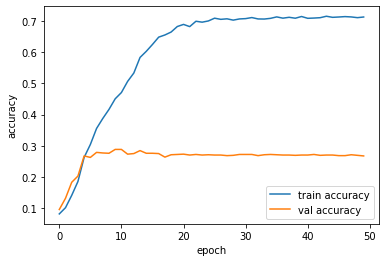

In [48]:
plt.plot(history_cnn.history['accuracy'], 
         label='train accuracy')
plt.plot(history_cnn.history['val_accuracy'], 
         label='val accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [49]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_text_len))
model_lstm.add(LSTM(169, recurrent_dropout = 0.2, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(169))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(13, activation='softmax'))

In [50]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [52]:
model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 32)           96000     
_________________________________________________________________
lstm (LSTM)                  (None, 100, 169)          136552    
_________________________________________________________________
dropout_8 (Dropout)          (None, 100, 169)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 169)               229164    
_________________________________________________________________
dropout_9 (Dropout)          (None, 169)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 13)                2210      
Total params: 463,926
Trainable params: 463,926
Non-trainable params: 0
________________________________________________

In [53]:
model_lstm_save_path = 'lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [54]:
history_lstm = model_lstm.fit(X_train, 
                            Y_train, 
                            epochs=50,
                            validation_data=(X_val, Y_val),
                            batch_size=256,
                            callbacks=[checkpoint_callback_lstm, learning_rate_reduction])

Epoch 1/50
38/38 [==============================] - 84s 2s/step - loss: 2.5273 - accuracy: 0.0972 - val_loss: 2.4929 - val_accuracy: 0.1186

Epoch 00001: val_accuracy improved from -inf to 0.11860, saving model to lstm.h5
Epoch 2/50
38/38 [==============================] - 80s 2s/step - loss: 2.3675 - accuracy: 0.1432 - val_loss: 2.3641 - val_accuracy: 0.1300

Epoch 00002: val_accuracy improved from 0.11860 to 0.12998, saving model to lstm.h5
Epoch 3/50
38/38 [==============================] - 80s 2s/step - loss: 2.2815 - accuracy: 0.1642 - val_loss: 2.4301 - val_accuracy: 0.1423

Epoch 00003: val_accuracy improved from 0.12998 to 0.14231, saving model to lstm.h5
Epoch 4/50
38/38 [==============================] - 80s 2s/step - loss: 2.2427 - accuracy: 0.1894 - val_loss: 2.3085 - val_accuracy: 0.1888

Epoch 00004: val_accuracy improved from 0.14231 to 0.18880, saving model to lstm.h5
Epoch 5/50
38/38 [==============================] - 80s 2s/step - loss: 2.1371 - accuracy: 0.2394 - val

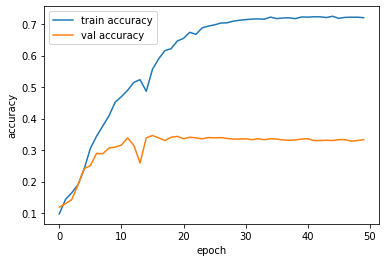

In [55]:
plt.plot(history_lstm.history['accuracy'], 
         label='train accuracy')
plt.plot(history_lstm.history['val_accuracy'], 
         label='val accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [56]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_text_len))
model_gru.add(GRU(169, recurrent_dropout = 0.2, return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(169))
model_gru.add(Dropout(0.3))
model_gru.add(Dense(13, activation='softmax'))

In [57]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [58]:
model_gru.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 32)           96000     
_________________________________________________________________
gru (GRU)                    (None, 100, 169)          102921    
_________________________________________________________________
dropout_10 (Dropout)         (None, 100, 169)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 169)               172380    
_________________________________________________________________
dropout_11 (Dropout)         (None, 169)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 13)                2210      
Total params: 373,511
Trainable params: 373,511
Non-trainable params: 0
________________________________________________

In [59]:
model_gru_save_path = 'gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [60]:
upd_history_gru = model_gru.fit(X_train, 
                            Y_train, 
                            epochs=50,
                            validation_data=(X_val, Y_val),
                            batch_size=256,
                            callbacks=[checkpoint_callback_gru, learning_rate_reduction])

Epoch 1/50
38/38 [==============================] - 69s 2s/step - loss: 2.5640 - accuracy: 0.0837 - val_loss: 2.5562 - val_accuracy: 0.1309

Epoch 00001: val_accuracy improved from -inf to 0.13093, saving model to gru.h5
Epoch 2/50
38/38 [==============================] - 64s 2s/step - loss: 2.4131 - accuracy: 0.1635 - val_loss: 2.3270 - val_accuracy: 0.1841

Epoch 00002: val_accuracy improved from 0.13093 to 0.18406, saving model to gru.h5
Epoch 3/50
38/38 [==============================] - 64s 2s/step - loss: 2.1635 - accuracy: 0.2460 - val_loss: 2.2144 - val_accuracy: 0.2362

Epoch 00003: val_accuracy improved from 0.18406 to 0.23624, saving model to gru.h5
Epoch 4/50
38/38 [==============================] - 65s 2s/step - loss: 1.9642 - accuracy: 0.3187 - val_loss: 2.1257 - val_accuracy: 0.2524

Epoch 00004: val_accuracy improved from 0.23624 to 0.25237, saving model to gru.h5
Epoch 5/50
38/38 [==============================] - 64s 2s/step - loss: 1.7985 - accuracy: 0.3828 - val_los

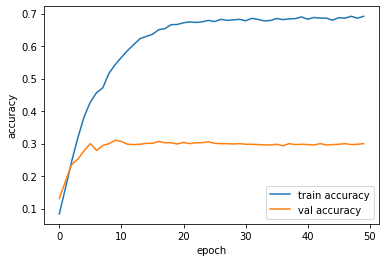

In [61]:
plt.plot(upd_history_gru.history['accuracy'], 
         label='train accuracy')
plt.plot(upd_history_gru.history['val_accuracy'], 
         label='val accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [62]:
test = pd.read_csv('test.csv', header=0)
x_test = test['MESSAGE']
y_test = utils.to_categorical(test['THEME'],file_names_size)

In [63]:
upd_x_test = []
i = 0

for i in x_test:
  upd_test = token_and_stem(i)
  upd_x_test.append(upd_test)

In [64]:
tokens = []
test = []

for x_tr in upd_x_test:
  for token in x_tr:
    if token not in stopwords:
      tokens.append(token)
  test.append(tokens)
  tokens = []

In [65]:
test_sequences = tokenizer.texts_to_sequences(test)
x_test = pad_sequences(test_sequences, maxlen=max_text_len)

In [66]:
model_cnn.load_weights(model_cnn_save_path)
model_cnn.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 3s 40ms/step - loss: 2.2854 - accuracy: 0.2862


[2.2853591442108154, 0.2862016558647156]

In [67]:
from sklearn.metrics import classification_report
pred = model_cnn.predict(x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
answer_y_test = np.argmax(y_test, axis=1)
print(classification_report(answer_y_test, pred))

              precision    recall  f1-score   support

           0       0.24      0.25      0.24       202
           1       0.33      0.40      0.36       201
           2       0.33      0.33      0.33       202
           3       0.10      0.03      0.05       201
           4       0.17      0.17      0.17       202
           5       0.13      0.09      0.11       203
           6       0.24      0.25      0.25       203
           7       0.34      0.36      0.35       203
           8       0.28      0.43      0.34       205
           9       0.38      0.57      0.45       203
          10       0.17      0.06      0.09       204
          11       0.19      0.15      0.16       204
          12       0.46      0.61      0.53       205

    accuracy                           0.29      2638
   macro avg       0.26      0.29      0.26      2638
weighted avg       0.26      0.29      0.26      2638



In [68]:
model_lstm.load_weights(model_lstm_save_path)
model_lstm.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 10s 120ms/step - loss: 2.2545 - accuracy: 0.3340


[2.254488706588745, 0.33396512269973755]

In [69]:
pred = model_lstm.predict(x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
answer_y_test = np.argmax(y_test, axis=1)
print(classification_report(answer_y_test, pred))

              precision    recall  f1-score   support

           0       0.45      0.37      0.41       202
           1       0.39      0.38      0.38       201
           2       0.38      0.40      0.39       202
           3       0.16      0.06      0.09       201
           4       0.20      0.23      0.21       202
           5       0.26      0.20      0.23       203
           6       0.32      0.30      0.31       203
           7       0.39      0.30      0.34       203
           8       0.37      0.39      0.38       205
           9       0.47      0.59      0.52       203
          10       0.16      0.15      0.15       204
          11       0.18      0.33      0.24       204
          12       0.59      0.65      0.62       205

    accuracy                           0.33      2638
   macro avg       0.33      0.33      0.33      2638
weighted avg       0.33      0.33      0.33      2638



In [70]:
model_gru.load_weights(model_gru_save_path)
model_gru.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 6s 78ms/step - loss: 2.2362 - accuracy: 0.3275


[2.236161231994629, 0.32752084732055664]

In [71]:
pred = model_gru.predict(x_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
answer_y_test = np.argmax(y_test, axis=1)
print(classification_report(answer_y_test, pred))

              precision    recall  f1-score   support

           0       0.39      0.43      0.41       202
           1       0.33      0.36      0.35       201
           2       0.36      0.37      0.36       202
           3       0.14      0.03      0.06       201
           4       0.20      0.20      0.20       202
           5       0.24      0.22      0.23       203
           6       0.29      0.33      0.31       203
           7       0.33      0.32      0.33       203
           8       0.33      0.54      0.41       205
           9       0.47      0.50      0.48       203
          10       0.17      0.13      0.15       204
          11       0.22      0.23      0.22       204
          12       0.57      0.60      0.59       205

    accuracy                           0.33      2638
   macro avg       0.31      0.33      0.31      2638
weighted avg       0.31      0.33      0.31      2638



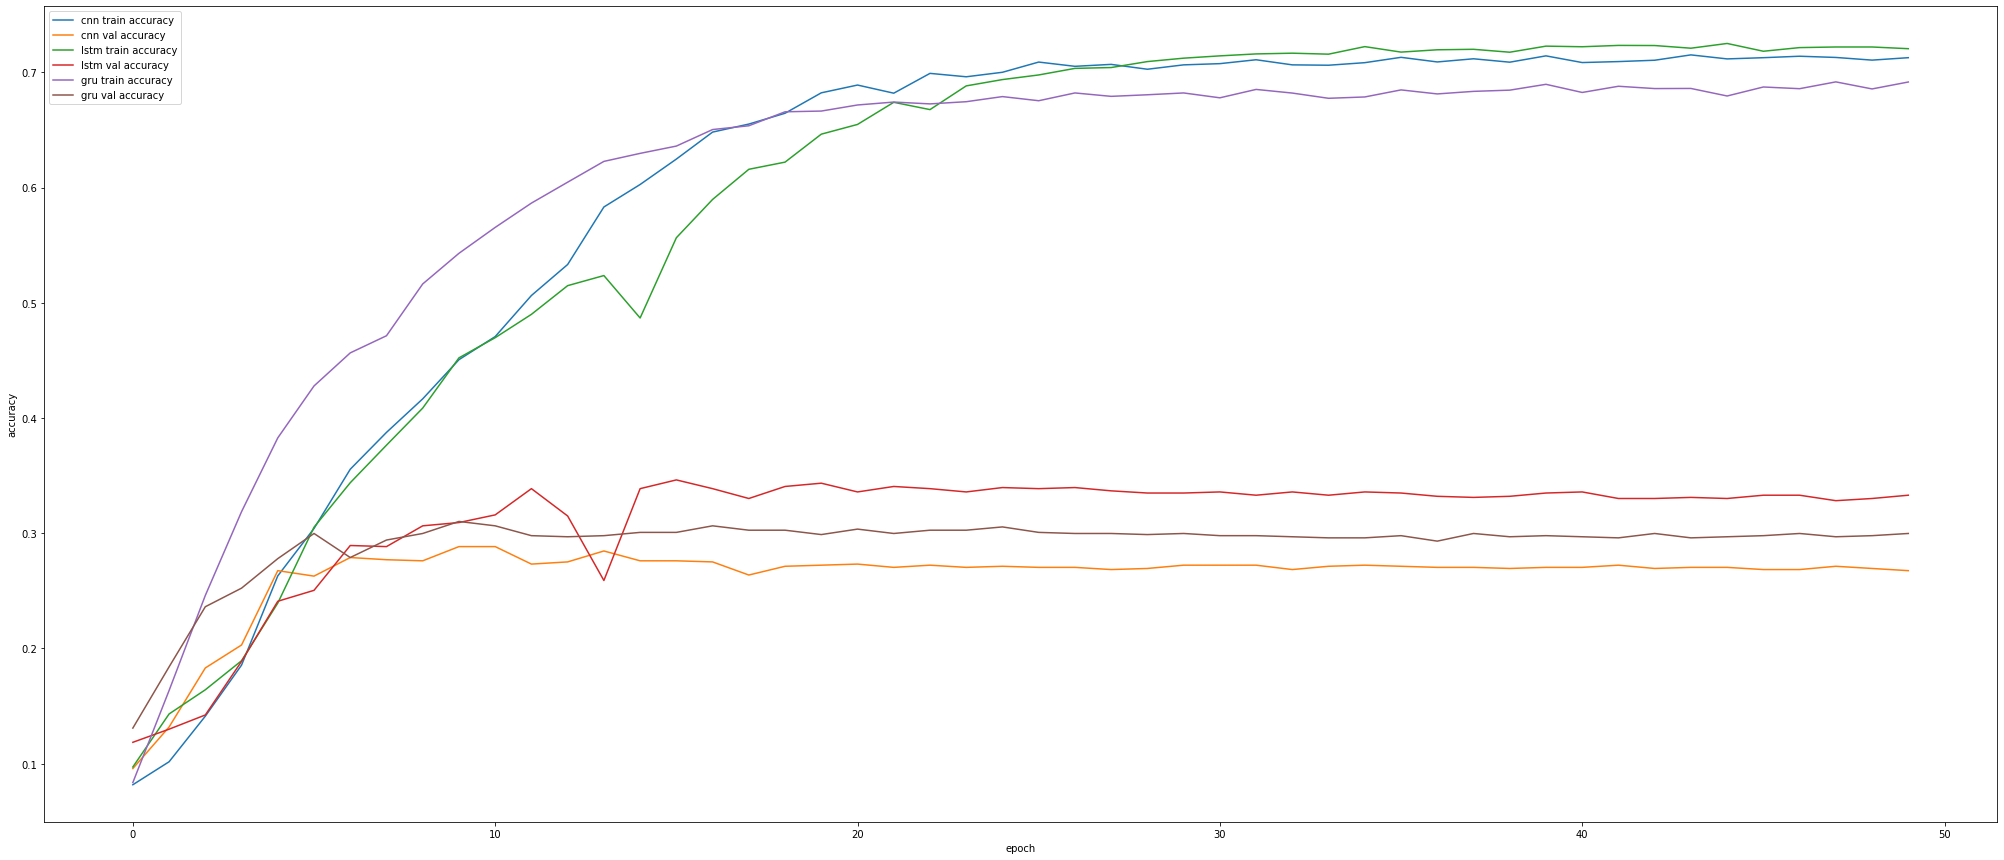

In [73]:
plt.plot(history_cnn.history['accuracy'], 
         label='cnn train accuracy')
plt.plot(history_cnn.history['val_accuracy'], 
         label='cnn val accuracy')

plt.plot(history_lstm.history['accuracy'], 
         label='lstm train accuracy')
plt.plot(history_lstm.history['val_accuracy'], 
         label='lstm val accuracy')

plt.plot(upd_history_gru.history['accuracy'], 
         label='gru train accuracy')
plt.plot(upd_history_gru.history['val_accuracy'], 
         label='gru val accuracy')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.rcParams["figure.figsize"] = (35,15)
plt.legend()
plt.show()